# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys


for p in ['..', '../..', '../../..', '../../../..']:
    d = os.path.abspath(p)
    if d not in sys.path:
        sys.path.insert(0,d)

        
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
d = [os.path.abspath('../../../../../custom_envs/gym-tiger'),
    os.path.abspath('../../../../../custom_envs/gym-dummy/')]
for _d in d:
    if _d not in sys.path:
        sys.path.insert(0, _d)


"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name


def reload():
    """Helper function for hot-reloading QLearnerObsActSeq class from source"""
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq',
        'QLearnerObsActSeq')
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer',
        'ObsActSeqFeatureTransformer')
    global QLearnerObsActSeq, play_one, ObsActSeqFeatureTransformer
    from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
        import QLearnerObsActSeq, play_one
    from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
        import ObsActSeqFeatureTransformer

# Tiger-v0

## Interact with env

In [2]:
import gym
import gym_tiger


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=5, obs_accuracy=1)

/Users/jblandin/miniconda3/envs/research/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
env.step(0)

([2], 10, False, {})

## Play 1 episode (100 steps per episode)

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [47]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import plot_running_avg
from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
    import QLearnerObsActSeq, play_one
from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
    import ObsActSeqFeatureTransformer


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=100, obs_accuracy=.85)

ft = ObsActSeqFeatureTransformer()

model = QLearnerObsActSeq(env, ft, initial_alpha=.5, gamma=0, alpha_decay=.4,
                          seq_len=2)

eps = 0.5
n = 0
done = False
ot = env.reset()

# model.add_observation(ot)
# model.add_action(-1)

print(model)
print()
play_one(env, model, eps, verbose=True)
print()
print(model)


############################################################

from tabulate import tabulate
rows = []
for t, a in enumerate(env.action_episode_memory[2]):
        a = env.translate_action(a)
        if t < len(env.observation_episode_memory[2]):
            o = env.observation_episode_memory[2][t]
            o = env.translate_obs(o)
            r = env.reward_episode_memory[2][t]
        else:
            o = 'n/a'
            r = 'n/a'
        row = [t, a, o, r]
        rows.append(row)
rows = tabulate(rows, headers=['t', 'a', 'o', 'r'])
print(rows)


Previous Action, Observation    OPEN_LEFT    OPEN_RIGHT    LISTEN
------------------------------  -----------  ------------  --------


t     | o_t-1       | a_t-1      | r     | o_t         | a_t       
----------------------------------------------------------------------------------------------------
0     | START       | OPEN_LEFT  | 10    | GROWL_RIGHT | OPEN_LEFT 
1     | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_LEFT 
2     | GROWL_RIGHT | LISTEN     | -1    | GROWL_RIGHT | LISTEN    
3     | GROWL_RIGHT | OPEN_LEFT  | 10    | GROWL_RIGHT | LISTEN    
4     | GROWL_RIGHT | LISTEN     | -1    | GROWL_LEFT  | OPEN_RIGHT
5     | GROWL_LEFT  | LISTEN     | -1    | GROWL_LEFT  | LISTEN    
6     | GROWL_LEFT  | OPEN_RIGHT | 10    | GROWL_LEFT  | OPEN_LEFT 
7     | GROWL_LEFT  | OPEN_RIGHT | 10    | GROWL_LEFT  | OPEN_LEFT 
8     | GROWL_LEFT  | OPEN_LEFT  | 10    | GROWL_RIGHT | OPEN_LEFT 
9     | GROWL_RIGHT | OPEN_LEFT  | 10    | GROWL_RIGHT | OPEN_LEFT 
10    | GROWL_

In [10]:
env.step(2)

([2], -1, False, {})

## Play 100 Episodes (500 steps per episode)


Previous Action, Observation                                                OPEN_LEFT    OPEN_RIGHT    LISTEN
--------------------------------------------------------------------------  -----------  ------------  --------
LISTEN-GROWL_RIGHT -- OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT       -52.43       -4.37         0.0 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT     -4.17        0.0 <<        -0.37
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_RIGHT    0.86 <<      -5.95         -0.01
OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT         -1.04        0.0           0.14 <<
OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT         -3.12        -5.25         -0.05 <<
LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT        2.63 <<      -4.47         -0.1
OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT     0.0 <<       0.0           -0.24
OPEN_LEFT


Previous Action, Observation                                                OPEN_LEFT    OPEN_RIGHT    LISTEN
--------------------------------------------------------------------------  -----------  ------------  --------
LISTEN-GROWL_RIGHT -- OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT       -49.34       -6.94         -0.27 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT     -10.05       -0.93         -0.38 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_RIGHT    0.07 <<      -5.56         -0.02
OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT         -0.53        -9.49         -0.42 <<
OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT         -6.59        -18.77        -0.35 <<
LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT        -4.79        -6.39         -1.15 <<
OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT     -9.07        -5.86         -0.33


Previous Action, Observation                                                OPEN_LEFT    OPEN_RIGHT    LISTEN
--------------------------------------------------------------------------  -----------  ------------  --------
LISTEN-GROWL_RIGHT -- OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT       -48.98       -6.94         -0.33 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT     -10.05       -0.93         -0.38 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_RIGHT    0.13 <<      -5.56         -0.02
OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT         -0.97        -9.49         -0.57 <<
OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT         -6.59        -18.77        -0.42 <<
LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT        -4.58        -6.89         -1.46 <<
OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT     -9.07        -5.86         -0.35


Previous Action, Observation                                                OPEN_LEFT    OPEN_RIGHT    LISTEN
--------------------------------------------------------------------------  -----------  ------------  --------
LISTEN-GROWL_RIGHT -- OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT       -48.98       -6.94         -0.35 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT     -10.05       -0.93         -0.38 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_RIGHT    0.13 <<      -5.56         -0.02
OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT         -0.91        -9.98         -0.68 <<
OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT         -6.59        -18.77        -0.45 <<
LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT        -5.56        -6.89         -1.64 <<
OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT     -9.07        -5.86         -0.36


Previous Action, Observation                                                OPEN_LEFT    OPEN_RIGHT    LISTEN
--------------------------------------------------------------------------  -----------  ------------  --------
LISTEN-GROWL_RIGHT -- OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT       -48.98       -6.94         -0.36 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT     -10.05       -0.93         -0.38 <<
OPEN_RIGHT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_RIGHT    0.13 <<      -5.56         -0.02
OPEN_RIGHT-GROWL_LEFT -- OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT         -0.91        -9.98         -0.73 <<
OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT         -6.59        -18.77        -0.46 <<
LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT        -6.51        -6.89         -1.75 <<
OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT     -9.07        -5.86         -0.36

avg reward for last 50 episodes: 149.91666666666666


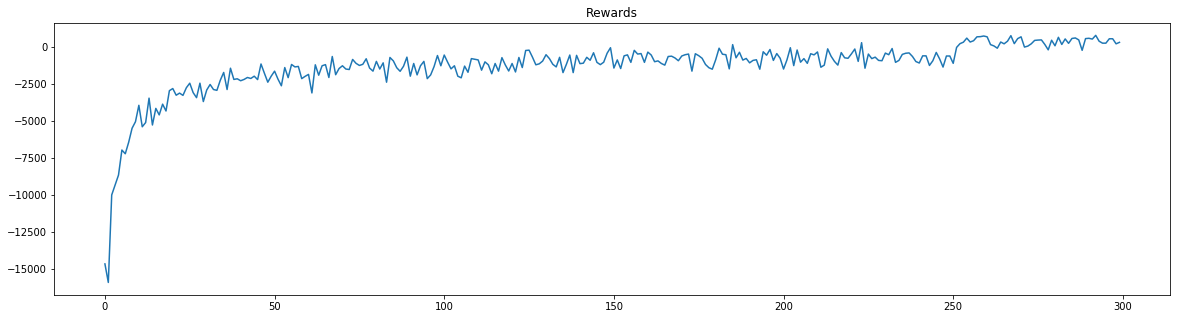

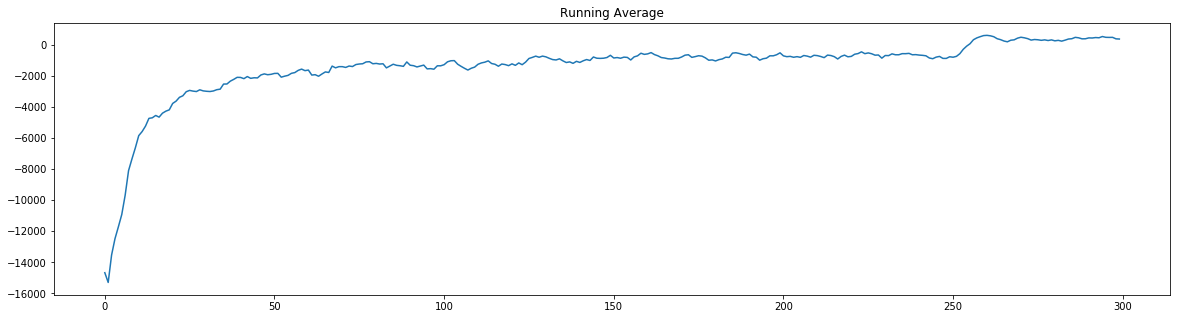

In [46]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import plot_running_avg
from experiments.qlearning.basic.qlearner_obs_act_seq.qlearner_obs_act_seq \
    import QLearnerObsActSeq, play_one
from experiments.qlearning.basic.qlearner_obs_act_seq.feature_transformer \
    import ObsActSeqFeatureTransformer


env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500, obs_accuracy=.85)

ft = ObsActSeqFeatureTransformer()

model = QLearnerObsActSeq(env, ft, initial_alpha=.5, gamma=.8, alpha_decay=.4,
                          seq_len=3)

eps = 1
n = 0
done = False
ot = env.reset()

N = 300
totalrewards = np.empty(N)
for n in range(N):
    if n > (N-50):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print(str(model))

print("avg reward for last 50 episodes:",
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

## Inspect model

In [67]:
print(model)


Previous Action, Observation                        OPEN_LEFT    OPEN_RIGHT       LISTEN
------------------------------------------------  -----------  ------------  -----------
LISTEN-START -- OPEN_RIGHT-START                  -50.527        -0.921103   -0.0280611
LISTEN-START -- OPEN_RIGHT-GROWL_LEFT              -0.64476       0           0
OPEN_RIGHT-START -- OPEN_LEFT-GROWL_LEFT           -1.01189      -0.945322   -0.39688
OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_RIGHT        -29.3078      -30.3854     -4.42596
OPEN_LEFT-GROWL_LEFT -- LISTEN-GROWL_LEFT         -36.429       -41.3711     -4.445
LISTEN-GROWL_LEFT -- OPEN_RIGHT-GROWL_RIGHT       -23.662       -39.5812     -4.46593
OPEN_RIGHT-GROWL_RIGHT -- LISTEN-GROWL_RIGHT      -25.5011      -31.9808     -4.05043
LISTEN-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT       -31.6167      -34.559      -4.36748
OPEN_LEFT-GROWL_RIGHT -- OPEN_LEFT-GROWL_RIGHT    -17.567       -35.7203     -0.596349
OPEN_LEFT-GROWL_RIGHT -- OPEN_RIGHT-GROWL_RIGHT   -2

# TwoInARow-v0

avg reward for last 20.0 episodes: 99.2


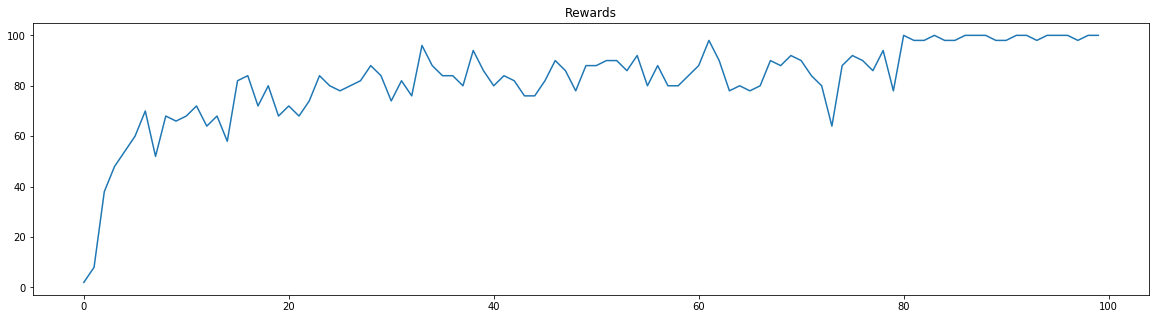

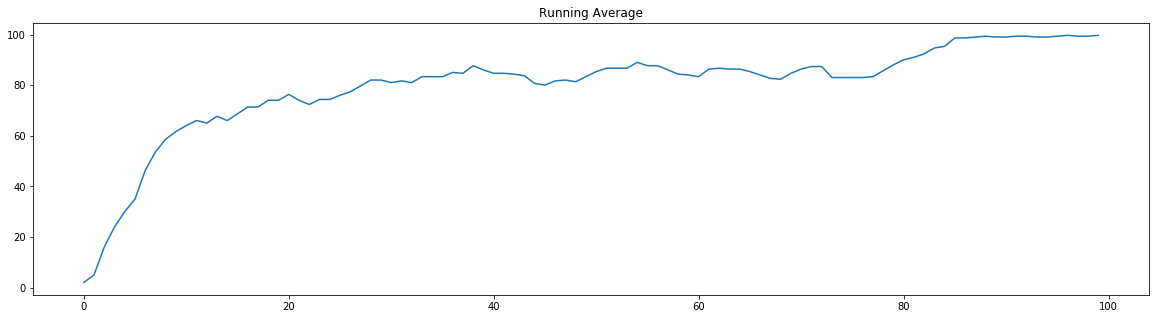

In [4]:
import gym
import gym_dummy
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
    import QLearnerObsSeq
from experiments.qlearning.basic.qlearner_obs_seq.feature_transformer \
    import SeqFeatureTransformer

env = gym.make('TwoInARow-v0')
ft = SeqFeatureTransformer()
model = QLearnerObsSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                       seq_len=2, translate=False)
eps = 1
n = 0
done = False
ot = env.reset()

N = 100
totalrewards = np.empty(N)
for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

In [13]:
display(model.last_n_obs)
model.predict([1])

[[0], [0]]

array([ 0.25381239, -1.88289797])